In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# keras 내장 함수
# from keras.utils.np_utils  import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [30]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 157us/step - loss: 2.8422 - acc: 0.4103 - val_loss: 1.9372 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.5651 - acc: 0.6913 - val_loss: 1.3749 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.1203 - acc: 0.7696 - val_loss: 1.1784 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.8723 - acc: 0.8217 - val_loss: 1.0464 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.6948 - acc: 0.8569 - val_loss: 0.9779 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.5507 - acc: 0.8918 - val_loss: 0.9446 - val_acc: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.4457 - acc: 0.9100 - val_loss: 0.9416 - val_acc: 0.8090
E

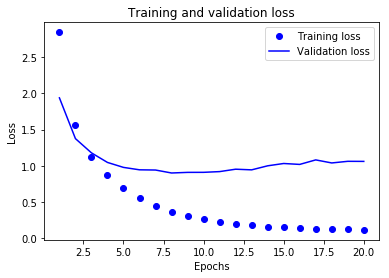

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

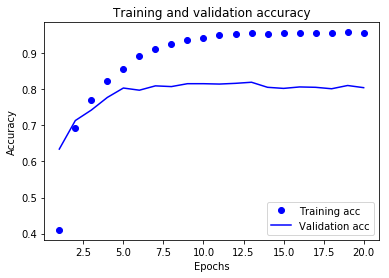

In [34]:
# 코드 3-10 훈련과 검증 정확도 그리기 (이미지 저장으로 변경)
history_dict = history.history
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 167us/step - loss: 2.6340 - acc: 0.5238 - val_loss: 1.7676 - val_acc: 0.6310
Epoch 2/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.4278 - acc: 0.7106 - val_loss: 1.3283 - val_acc: 0.7000
Epoch 3/9
7982/7982 [==============================] - 1s 99us/step - loss: 1.0546 - acc: 0.7825 - val_loss: 1.1417 - val_acc: 0.7450
Epoch 4/9
7982/7982 [==============================] - 1s 100us/step - loss: 0.8242 - acc: 0.8297 - val_loss: 1.0494 - val_acc: 0.7670
Epoch 5/9
7982/7982 [==============================] - 1s 100us/step - loss: 0.6557 - acc: 0.8637 - val_loss: 0.9778 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.5221 - acc: 0.8944 - val_loss: 0.9249 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.4192 - acc: 0.9134 - val_loss: 0.8969 - val_acc: 0.8100
Epoch 8/

In [36]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [38]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])